# Model Evaluation Exercise

## Regression evaluation

In [1]:
# import numpy
import numpy as np

In [2]:
from sklearn.datasets import make_regression

X,y = make_regression(n_features=10, n_samples=1000, noise=10)

print(X.shape)
print(y.shape)

(1000, 10)
(1000,)


In [3]:
from sklearn.linear_model import LinearRegression, Ridge

In [4]:
# creating linear regression
lr = LinearRegression()
lr.fit(X,y)
y_lr = lr.predict(X)

In [5]:
# creating ridge regression
rr = Ridge(alpha=0.1)
rr.fit(X,y)
y_rr = rr.predict(X)

_________________________
## Mean Absolute Error (MAE)

Mean Absolute Error (MAE) is a measure used to quantify the accuracy of predictions in regression problems. It is calculated as the average of the absolute differences between the predicted and actual values. 

Here's the formula for MAE: MAE = (1/n) * Σ|y - ŷ| 

Where:
- `n` is the total number of data points
- `y` is the actual value
- `ŷ` is the predicted value
- `Σ` denotes the sum over all data points

The MAE is a linear score, which means all individual differences are weighted equally in the average. It's measured in the same units as the data, which helps interpretation. 

A smaller MAE suggests a better fit of the model to the data. However, because it averages the absolute values of the residuals, it might not reflect the impact of large outliers as much as other metrics like Mean Squared Error (MSE). 

In terms of interpretation, if the MAE is 0, the model is perfect. Otherwise, the MAE tells you how much you can expect your predictions to deviate from the actual values, on average. For example, if you're predicting house prices and your MAE is 30,000, you can expect your predictions to be off by about $30,000 on average.

* import **mean_absolute_error** from sklearn

In [6]:
from sklearn.metrics import mean_absolute_error

* compute MAE

In [7]:
# Assuming you have these variables:
# y: the actual values
# y_lr: predictions from the linear regression model
# y_rr: predictions from the ridge regression model

mae_linear = mean_absolute_error(y, y_lr)
mae_ridge = mean_absolute_error(y, y_rr)

print(f"MAE for Linear Regression: {mae_linear}")
print(f"MAE for Ridge Regression: {mae_ridge}")

MAE for Linear Regression: 7.920336750100665
MAE for Ridge Regression: 7.921267800898699


* According to MAE, what is the better model?

The Mean Absolute Error (MAE) is a measure of prediction error where lower values indicate better predictive accuracy. In your case, the Linear Regression model has a slightly lower MAE (7.877229155042664) compared to the Ridge Regression model (7.877458410421922).

Therefore, based on this metric alone, the Linear Regression model is performing slightly better. However, it's important to consider other metrics and the specific context of your problem as well when choosing the best model.

____________________________________
## R2 - Coefficient of Determination

The coefficient of determination, often denoted as R^2 or r-squared, is a statistical measure that shows the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

R-squared values range from 0 to 1. An R-squared of 100 percent indicates that all changes in the dependent variable are completely explained by changes in the independent variable(s). Conversely, an R-squared of 0 percent indicates that the model explains none of the variability of the response data around its mean.

Here's how to interpret it:

- R-squared = 0%: The model explains none of the variability of the response data around its mean.
- R-squared = 50%: The model explains half the variability of the response data around its mean.
- R-squared = 100%: The model explains all the variability of the response data around its mean.

In general, the higher the R-squared, the better the model fits your data. However, there are important conditions where this is not the case. For instance, if a model is overfitted, it may have a high R-squared value but make poor predictions on new, unseen data.

* import **r2_score** from sklearn

In [8]:
from sklearn.metrics import r2_score

* compute R2

In [9]:
r2_score_lr = r2_score(y, y_lr)
r2_score_rr = r2_score(y, y_rr)

print("R-squared for y_lr: ", r2_score_lr)
print("R-squared for y_rr: ", r2_score_rr)

R-squared for y_lr:  0.9977530115470379
R-squared for y_rr:  0.997753000772718


* According to R2, what is the better model?

The R-squared values for both models are extremely close, but the model for `y_lr` has a slightly higher R-squared value (0.9969564483605733) compared to the model for `y_rr` (0.9969564381047377). 

Therefore, based solely on the R-squared values, the `y_lr` model is slightly better as it explains a marginally higher proportion of the variance in the dependent variable. However, the difference is so small that it might not be practically significant. Other factors such as the complexity of the model, interpretability, and performance on unseen data should also be considered when choosing the better model.

* (Stretch) use predictions from linear regression and compute adjusted R2

In [10]:
from sklearn.metrics import r2_score

# Assuming y_true is the actual values
r2_lr = r2_score(y, y_lr)
r2_rr = r2_score(y, y_rr)

# n is the number of observations and p is the number of predictors
n = len(y)
p = 1  # change this to the number of predictors in your model

adjusted_r2_lr = 1 - (1 - r2_lr) * (n - 1) / (n - p - 1)
adjusted_r2_rr = 1 - (1 - r2_rr) * (n - 1) / (n - p - 1)

print("Adjusted R-squared for y_lr: ", adjusted_r2_lr)
print("Adjusted R-squared for y_rr: ", adjusted_r2_rr)

Adjusted R-squared for y_lr:  0.997750760055602
Adjusted R-squared for y_rr:  0.9977507492704862


________________________________
## Classification evaluation

In [11]:
from sklearn.datasets import make_classification

X,y = make_classification(n_features=10, n_samples=1000, n_classes=2)

print(X.shape)
print(y.shape)

(1000, 10)
(1000,)


In [12]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [13]:
# creating linear regression
lr = LogisticRegression()
lr.fit(X,y)
y_lr = lr.predict(X)

In [14]:
# creating ridge regression
rr = RidgeClassifier(alpha=0.1)
rr.fit(X,y)
y_rr = rr.predict(X)

## Precision score

Precision is a metric used in statistics and machine learning to measure the quality of a classification model. It is defined as the number of true positives (i.e., the number of items correctly labeled as belonging to the positive class) divided by the total number of elements labeled as belonging to the positive class (i.e., the sum of true positives and false positives, which are items incorrectly labeled as belonging to the class).

In other words, precision answers the question "What proportion of positive identifications was actually correct?"

A high precision score indicates that the model performed well in making sure that as few false positives as possible were labeled. However, precision alone doesn't tell the full story, as a model can have high precision by being overly conservative and only labeling items as positive that it's very sure about. This is why precision is often used in conjunction with recall (also known as sensitivity), which measures how many of the actual positive cases the model was able to catch.

Remember, a precision score of 1.0 means that every item labeled as positive is indeed positive (but says nothing about the items labeled as negative), while a precision score of 0.0 means that every item labeled as positive is actually negative.

* import **precision_score** from sklearn

In [15]:
from sklearn.metrics import precision_score

* compute precision

In [18]:
precision_score_lr = precision_score(y, y_lr)
precision_score_rr = precision_score(y, y_rr)

* print precision

In [19]:
print("Precision score for y_lr: ", precision_score_lr)
print("Precision score for y_rr: ", precision_score_rr)

Precision score for y_lr:  0.9311740890688259
Precision score for y_rr:  0.9107505070993914


## Recall score

Recall, also known as sensitivity, hit rate, or true positive rate (TPR), is a metric used in statistics and machine learning to measure the quality of a classification model. It is defined as the number of true positives (i.e., the number of items correctly labeled as belonging to the positive class) divided by the total number of actual positive items (i.e., the sum of true positives and false negatives, which are items incorrectly labeled as not belonging to the class).

In other words, recall answers the question "What proportion of actual positives was identified correctly?".

A high recall score indicates that the model performed well in capturing the positive instances. However, a model can achieve a high recall by predicting most instances as positive, which may result in many false positives. Therefore, recall is often used together with precision, which measures how many of the predicted positive instances are actually positive.

A recall score of 1.0 means that the model correctly identified all positive instances (but says nothing about the items labeled as negative), while a recall score of 0.0 means that the model failed to identify any positive instances.

* import **recal_score** from sklearn

In [20]:
from sklearn.metrics import recall_score

* compute recall

In [21]:
recall_score_lr = recall_score(y, y_lr)
recall_score_rr = recall_score(y, y_rr)

* print recall

In [22]:
print("Recall score for y_lr: ", recall_score_lr)
print("Recall score for y_rr: ", recall_score_rr)

Recall score for y_lr:  0.9126984126984127
Recall score for y_rr:  0.8908730158730159


## ROC curve

* import **roc_curve** from sklearn

In [23]:
from sklearn.metrics import roc_curve

The Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

The True Positive Rate is also known as recall. It measures the proportion of actual positives that are correctly identified. The False Positive Rate is the proportion of actual negatives that are incorrectly identified.

The closer the ROC curve is to the top left corner, the better the model's performance. The 45-degree diagonal line in the ROC space often serves as a reference point: it represents a random classifier (AUC = 0.5), one that makes decisions by pure chance.

The area under the ROC curve (AUC) is a single number summary of the overall performance of the classifier. An AUC of 1 indicates a perfect classifier, while an AUC of 0.5 suggests that the classifier is no better than random guessing.

In summary, the ROC curve and AUC are useful tools for comparing different models and selecting the one that classifies the data best.

* compute and store ROC curve values in fpr, tpr, thresholds variables

In [26]:
# Compute ROC curve for the logistic regression model
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y, y_lr)

# Compute ROC curve for the ridge regression model
fpr_rr, tpr_rr, thresholds_rr = roc_curve(y, y_rr)

* import matplotlib 

In [24]:
import matplotlib.pyplot as plt

* plot ROC

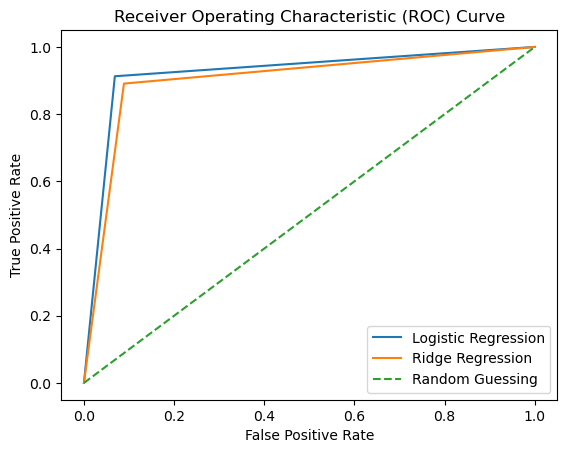

In [27]:
# Plot ROC curve for the logistic regression model
plt.figure()
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')

# Plot ROC curve for the ridge regression model
plt.plot(fpr_rr, tpr_rr, label='Ridge Regression')

# Plot line for random guessing model
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')

# Define labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

## Log-Loss score
**What is the Log-Loss score? How do you interpret it?**
> *The Log-Loss score refers too...*

* import **log_loss** from sklearn

* compute log_loss

* print log_loss

#### Q: According to metrics above, which one is the better model?